**We will import the necessary modules for handling our data**
* pandas : For handling csv dataset
* numpy : Support for Pandas and calculations
* Matplotlib - For visualization (Plotting graphs)
* keras - Prediction Models

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import cv2 as cv

from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
from keras.optimizers import Adam,RMSprop 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import pickle

%matplotlib inline

Using TensorFlow backend.


**We now load our training and testing sets**
* they contain images of size 16*16 (256) having a sing channel
* the images have already been converted to their equivalent arrays
* Each image has a pixel value in the range of 0 to 255 but has been standardized to values between 0 and 1
* the image labels are from 0-9

In [2]:
l=[]
l.append('label')
for i in range (257):
    l.append('pixel'+str(i))
#print(len(l))
np.random.seed(1) # seed
train = pd.read_csv("train-data.txt",sep=' ',names=l) # Loading Dataset
train.drop('pixel256',inplace=True,axis=1)
# Random permutaion for dataset (seed is used to resample the same permutation every time)
train =train.iloc[np.random.permutation(len(train))]


In [3]:
print(train.shape)
train.head()

(7291, 257)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255
1766,3.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.651,-0.048,0.687,...,0.489,0.845,0.380,-0.126,-0.787,-1.0,-1.0,-1.0,-1.0,-1.0
4760,0.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.754,-0.311,-0.075,...,-0.075,-0.075,-0.171,-0.697,-0.801,-1.0,-1.0,-1.0,-1.0,-1.0
3630,8.0,-1.0,-1.0,-1.0,-1.0,-0.992,0.201,0.935,0.494,-0.467,...,-0.620,0.632,1.000,0.144,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
5911,4.0,-1.0,-1.0,-1.0,-1.0,-0.187,0.250,-1.000,-1.000,-1.000,...,0.057,0.622,-0.904,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
5622,9.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.996,-0.262,0.561,...,-1.000,0.539,0.295,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
test = pd.read_csv("test-data.txt",sep=' ',names=l) # Loading Dataset
test.drop('pixel256',inplace=True,axis=1)
# Random permutaion for dataset (seed is used to resample the same permutation every time)
test =test.iloc[np.random.permutation(len(test))]


In [5]:
print(test.shape)
test.head()

(2007, 257)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255
764,8.0,-1.0,-1.0,-0.997,-0.190,0.467,1.000,1.000,1.000,0.701,...,1.000,1.000,0.623,-0.244,-0.892,-1.000,-1.0,-1.0,-1.0,-1.0
1412,0.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.728,0.464,0.890,-0.267,...,0.604,0.953,0.351,-0.136,-0.757,-1.000,-1.0,-1.0,-1.0,-1.0
1341,8.0,-1.0,-1.0,-0.814,-0.245,0.518,1.000,1.000,1.000,1.000,...,-0.750,0.059,1.000,1.000,0.198,-0.978,-1.0,-1.0,-1.0,-1.0
82,7.0,-1.0,-1.0,-1.000,-1.000,-0.986,0.068,0.200,0.279,-0.366,...,-1.000,-0.078,0.511,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
1051,4.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0


In [6]:
#sample_size = df_train.shape[0] # Training set size
#validation_size = int(df_train.shape[0]*0.1) # Validation set size 

# train_x and train_y
X_train = np.asarray(train.iloc[:train.shape[0],1:]).reshape([train.shape[0],16,16,1]) # taking all columns expect column 0
y_train = np.asarray(train.iloc[:train.shape[0],0]).reshape([train.shape[0],1]) # taking column 0


# val_x and val_y
val_x = np.asarray(test.iloc[:test.shape[0]:,1:]).reshape([test.shape[0],16,16,1])
val_y = np.asarray(test.iloc[:test.shape[0]:,0]).reshape([test.shape[0],1])

In [7]:
X_train.shape,y_train.shape

((7291, 16, 16, 1), (7291, 1))

In [8]:
#df_test = pd.read_csv("../input/digit-recognizer/test.csv")
#test_x = np.asarray(df_test.iloc[:,:]).reshape([-1,28,28,1])

In [9]:
# convirting pixel values in range [0,1]
X_train = X_train/255.
val_x = val_x/255.


**Data Visualization**
* We check the frequency proportion of each label in both testing and validation set

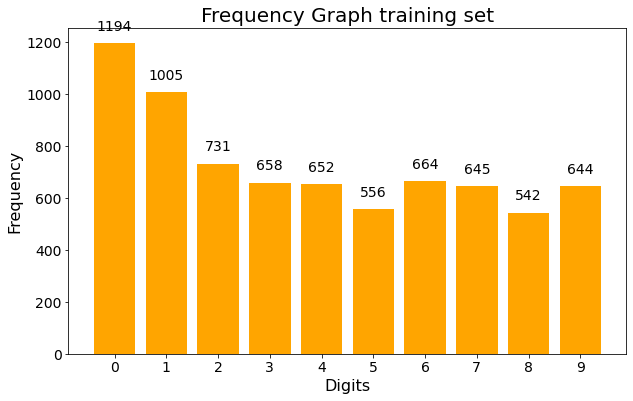

In [10]:
# Cheacking frequency of digits in training and validation set
counts = train.iloc[:train.shape[0],:].groupby('label')['label'].count()
# df_train.head(2)
# counts
f = plt.figure(figsize=(10,6))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="orange")
for i in counts.index:
    plt.text(i,counts.values[int(i)]+50,str(counts.values[int(i)]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Frequency Graph training set",fontsize=20)
plt.savefig('digit_frequency_train.png')  
plt.show()

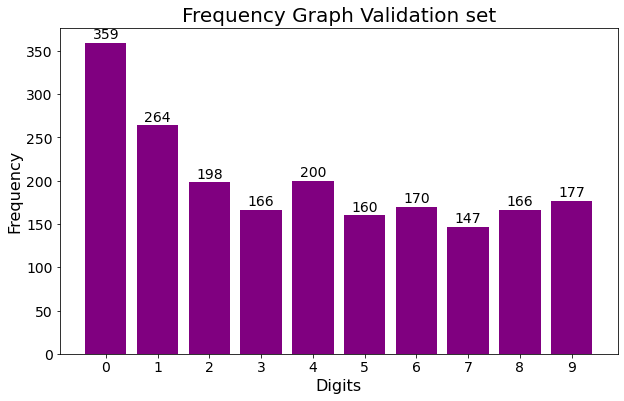

In [11]:
# df_train.iloc[sample_size-validation_index:,1:]
# Cheacking frequency of digits in training and validation set
counts = test.iloc[:test.shape[0],:].groupby('label')['label'].count()
# df_train.head(2)
# counts
f = plt.figure(figsize=(10,6))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="purple")
for i in counts.index:
    plt.text(i,counts.values[int(i)]+5,str(counts.values[int(i)]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Frequency Graph Validation set",fontsize=20)
plt.savefig('digit_frequency_val.png')
plt.show()

**Digit visualization**
* we now visualize how random selection of sample digits appear

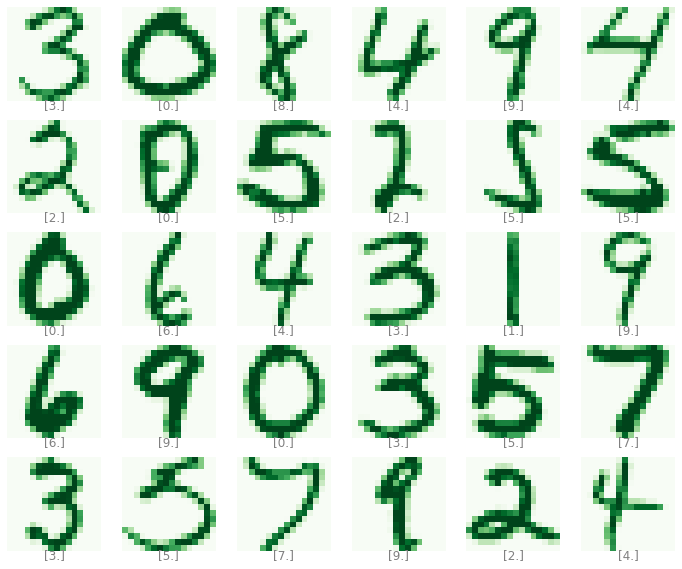

In [12]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(X_train[i].reshape([16,16]),cmap="Greens") 
    plt.axis("off")
    plt.title(str(y_train[i]), y=-0.15,color="gray")
plt.savefig("digits.png")

**Building Our model**
* We first initialize the model to Sequential using the Keras library
* we then added layers to our model using 2 blocks
* We set the last layer to dense and specify our number of outputs in the output layer

In [13]:
model = models.Sequential()

In [14]:
# Block 1
model.add(Conv2D(32,3, padding  ="same",input_shape=(16,16,1)))
model.add(LeakyReLU())
model.add(Conv2D(32,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation="sigmoid"))

**Compiling the model**
* We set the learning rate to 0.001
* we specify evaluation metrics to accuracy
* we the compile our model using the Adam compiler

In [15]:
lr = 0.001
loss = "sparse_categorical_crossentropy"
model.compile(Adam(lr=lr), loss=loss ,metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
__________

In [16]:
epochs = 100
batch_size = 256


**Data Augmentation**
* Augmentation Using Keras
* using the ImageDataGenerator() function of Keras for Image augmentation. Parameters to use:

* rotation_range: randomly rotate images in the range (degrees, 0 to 180)
* zoom_range: Randomly zoom image
* width_shift_range: randomly shift images horizontally (fraction of total width)
* height_shift_range: randomly shift images vertically (fraction of total height)
* horizontal_flip: randomly flip images (Can't be used in this case as it changes the digit)
* vertical_flip: randomly flip images (Can't be used in this case as it changes the digit)


In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

**Learning Rate**

* ReduceLROnPlateau() is a callback function provided by Keras,which is used to reduce the learning rate if when a metric has stopped improving.
* monitors the accuracy of th model, if there is no improvement after 2 epochs, reduces the learning rate
* contains the factor by which the learning rate will be reduced i.e lr*0.5
* minimum learning rate is the lower bound value for the learning rate

* model.fit_generator() is used to train the model on data generated batch-by-batch by image augmentation. The data generator is an iterator that generates and provides data as per request by fit_generator(). We can configure the batch size and get the batches by calling the flow() function.

In [18]:
lr2= ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5, min_lr=0.00001)

In [19]:
epochs = 100
history_2 = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                                steps_per_epoch=int(X_train.shape[0]/batch_size)+1,
                                epochs=epochs,validation_data=(val_x,val_y),callbacks=[lr2])

Epoch 1/100
29/29 [==============================] - 35s 1s/step - loss: 2.2831 - acc: 0.1606 - val_loss: 2.2683 - val_acc: 0.1789
Epoch 2/100
29/29 [==============================] - 34s 1s/step - loss: 2.2753 - acc: 0.1630 - val_loss: 2.2724 - val_acc: 0.1789
Epoch 3/100
29/29 [==============================] - 34s 1s/step - loss: 2.2689 - acc: 0.1636 - val_loss: 2.2348 - val_acc: 0.1789
Epoch 4/100
29/29 [==============================] - 34s 1s/step - loss: 1.7018 - acc: 0.4016 - val_loss: 0.9131 - val_acc: 0.7115
Epoch 5/100
29/29 [==============================] - 33s 1s/step - loss: 0.7751 - acc: 0.7470 - val_loss: 0.4875 - val_acc: 0.8590
Epoch 6/100
29/29 [==============================] - 37s 1s/step - loss: 0.4997 - acc: 0.8434 - val_loss: 0.3350 - val_acc: 0.9113
Epoch 7/100
29/29 [==============================] - 34s 1s/step - loss: 0.3774 - acc: 0.8867 - val_loss: 0.2866 - val_acc: 0.9302
Epoch 8/100
29/29 [==============================] - 34s 1s/step - loss: 0.3203 - a

29/29 [==============================] - 36s 1s/step - loss: 0.0420 - acc: 0.9860 - val_loss: 0.1552 - val_acc: 0.9676
Epoch 64/100
29/29 [==============================] - 36s 1s/step - loss: 0.0375 - acc: 0.9873 - val_loss: 0.1483 - val_acc: 0.9686
Epoch 65/100
29/29 [==============================] - 36s 1s/step - loss: 0.0415 - acc: 0.9867 - val_loss: 0.1539 - val_acc: 0.9666
Epoch 66/100
29/29 [==============================] - 36s 1s/step - loss: 0.0384 - acc: 0.9862 - val_loss: 0.1575 - val_acc: 0.9676
Epoch 67/100
29/29 [==============================] - 36s 1s/step - loss: 0.0392 - acc: 0.9873 - val_loss: 0.1618 - val_acc: 0.9636
Epoch 68/100
29/29 [==============================] - 36s 1s/step - loss: 0.0399 - acc: 0.9873 - val_loss: 0.1585 - val_acc: 0.9681
Epoch 69/100
29/29 [==============================] - 36s 1s/step - loss: 0.0368 - acc: 0.9872 - val_loss: 0.1455 - val_acc: 0.9691
Epoch 70/100
29/29 [==============================] - 36s 1s/step - loss: 0.0418 - acc: 0

**Training Performance.**
* We can see that after  training, the accuracy of training and 
* validation set almost converges with high accuracy. It seems that the model has been significantly improved after image augmentation

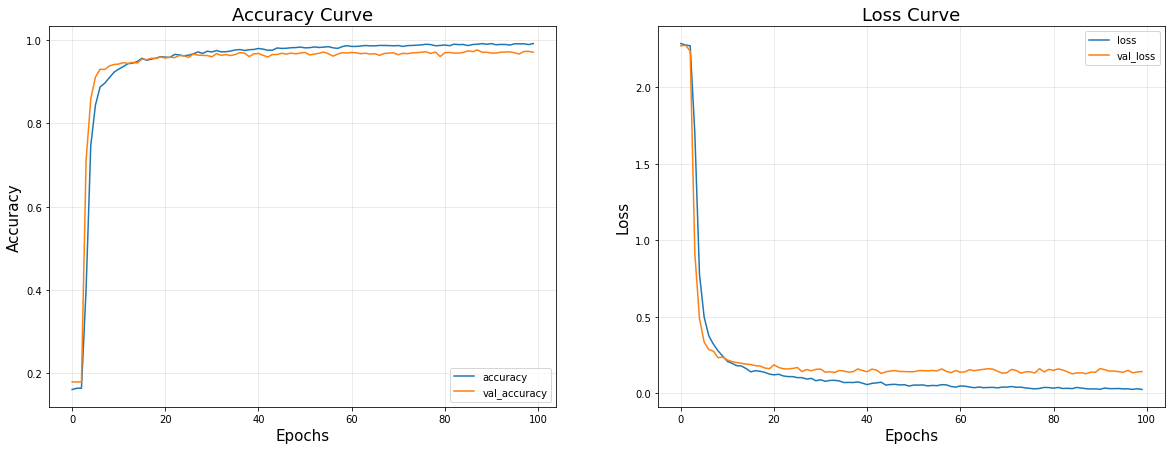

In [21]:
# Diffining Figure
f = plt.figure(figsize=(20,7))
f.add_subplot(121)

#Adding Subplot 1 (For Accuracy)
plt.plot(history_2.history['acc'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_2.history['val_acc'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history_2.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_2.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("accuracy_loss.png")
plt.show()

**Confusion Matrix, Error Rate and Accuracy**

In [22]:
val_p = np.argmax(model.predict(val_x),axis =1)

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(val_x.shape[0]):
    confusion_matrix[val_y[i].astype(int),val_p[i].astype(int)] += 1
    if val_y[i]!=val_p[i]:
        error +=1
        
confusion_matrix,error,(error*100)/val_p.shape[0],100-(error*100)/val_p.shape[0],val_p.shape[0]


print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/val_p.shape[0])
print("\nAccuracy : " ,100-(error*100)/val_p.shape[0])
print("\nValidation set Shape :",val_p.shape[0])


Errors in validation set:  58

Error Persentage :  2.8898854010961634

Accuracy :  97.11011459890383

Validation set Shape : 2007


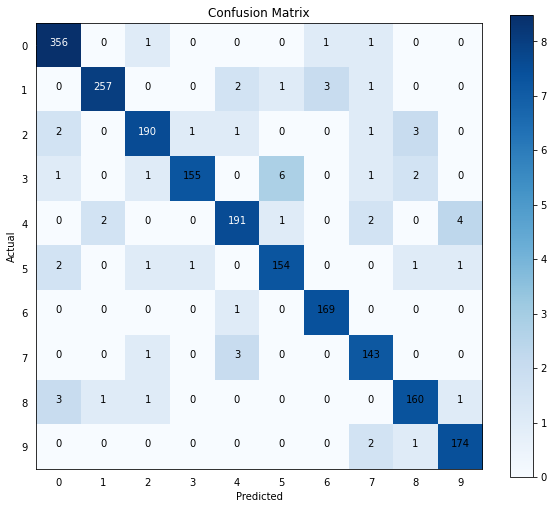

In [23]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Blues")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix.png")
plt.show()


### All Errors in the Validation set
* Let's see all the errors in the validation set.
* It seems that in most of the cases, the recognition of digits is difficult for even humans because of ineligibility.
* So we can say that our model is performing well, with an error rate of 2.44% and Acuracy of 97.56

2007


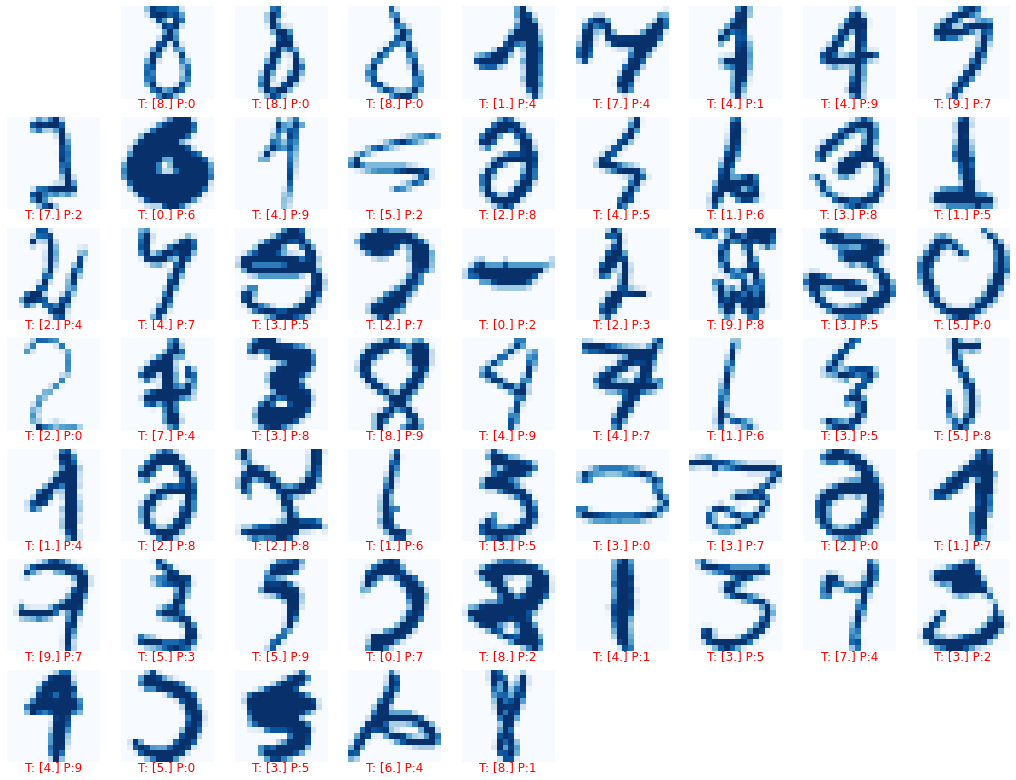

In [24]:
rows = 10
cols = 9
print(val_x.shape[0])
f = plt.figure(figsize=(2*cols,2*rows))
sub_plot = 2
for i in range(val_x.shape[0]):
    if val_y[i]!=val_p[i]:
        try:
            f.add_subplot(rows,cols,sub_plot) 
            sub_plot+=1
            plt.imshow(val_x[i].reshape([16,16]),cmap="Blues")
            plt.axis("off")
            plt.title("T: "+str(val_y[i])+" P:"+str(val_p[i]), y=-0.15,color="Red")
        except:
            pass
plt.savefig("error_plots.png")
plt.show()
